- Categorical : Classification Tree
- Numerical : Regression Tree
- Every Node has only two branches
- Trained on train data
- Tested on test data
- 

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
cancer = pd.read_csv('BreastCancer.csv', index_col=0)
cancer

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7,Malignant
1371026,5,10,10,10,4,10,5,6,3,Malignant
1371920,5,1,1,1,2,1,3,2,1,Benign


In [4]:
X = cancer.drop(columns='Class')
y = cancer.Class

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24,test_size=0.3, stratify=y)

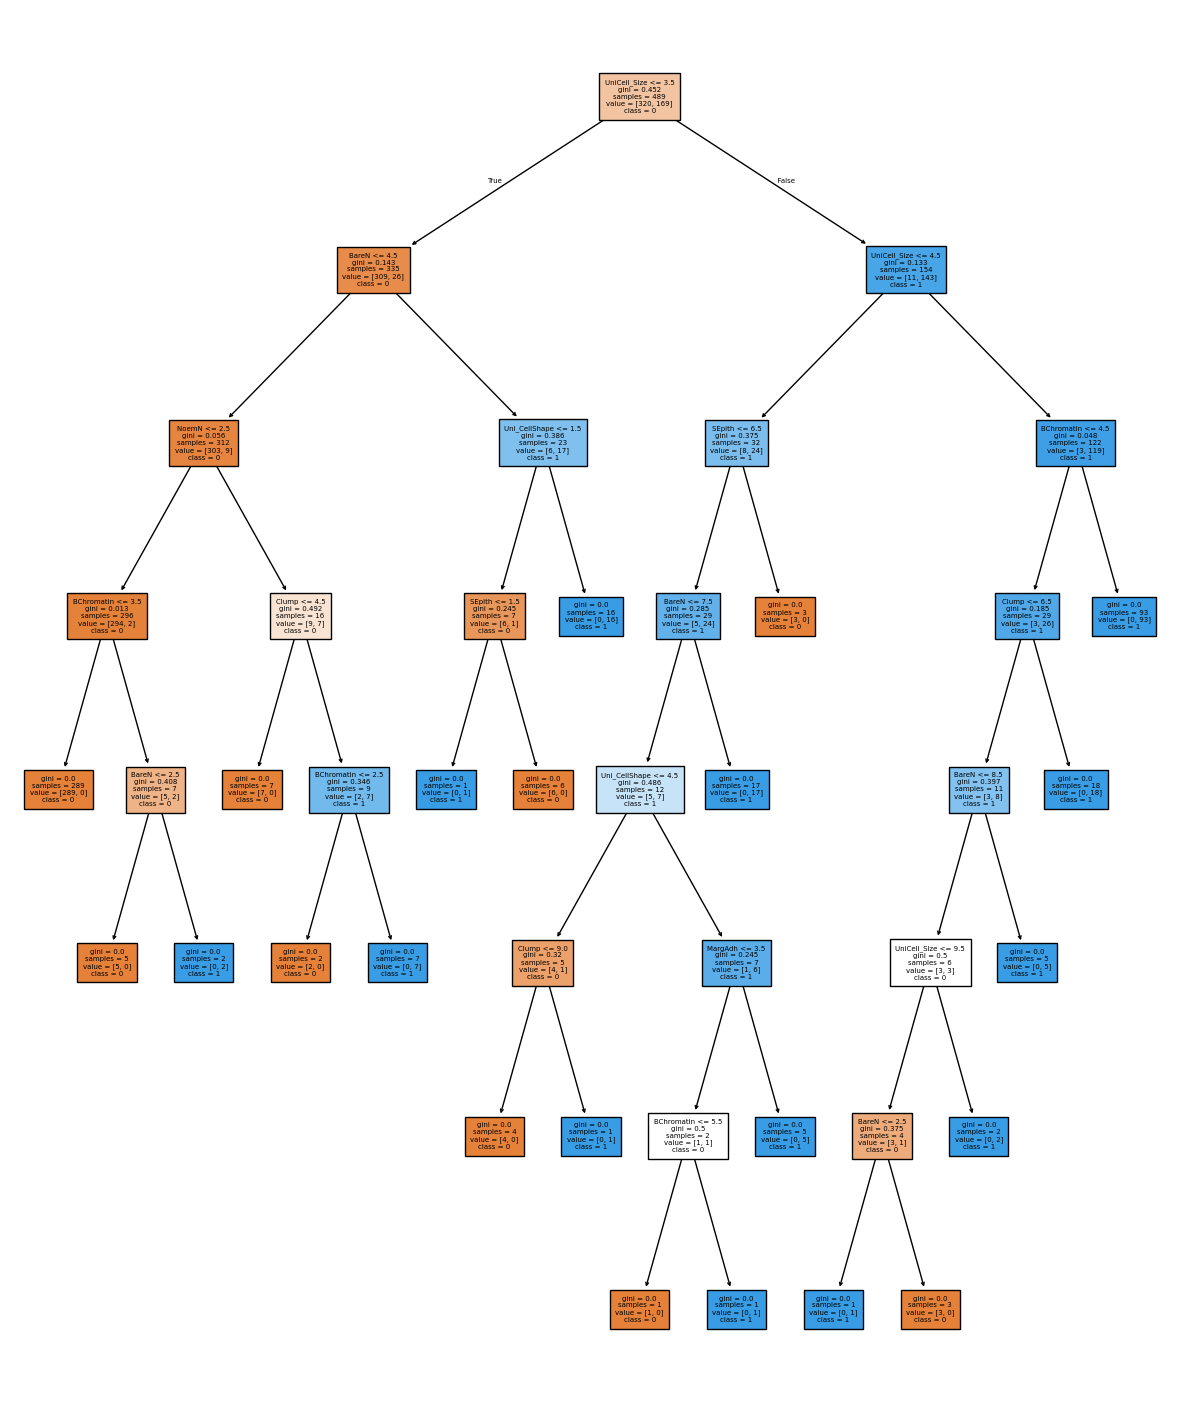

In [20]:
# with full Depth of Decision Tree beacuse by default it takes the full depth
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X_train,y_train)
plt.figure(figsize=(15,18))
plot_tree(dtc, feature_names= list(X.columns), class_names=['0','1'], filled= True, fontsize=5)
plt.show()

In [7]:
y_pred = dtc.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9523809523809523


In [8]:
print("Depth is:",dtc.get_depth())

Depth is: 7


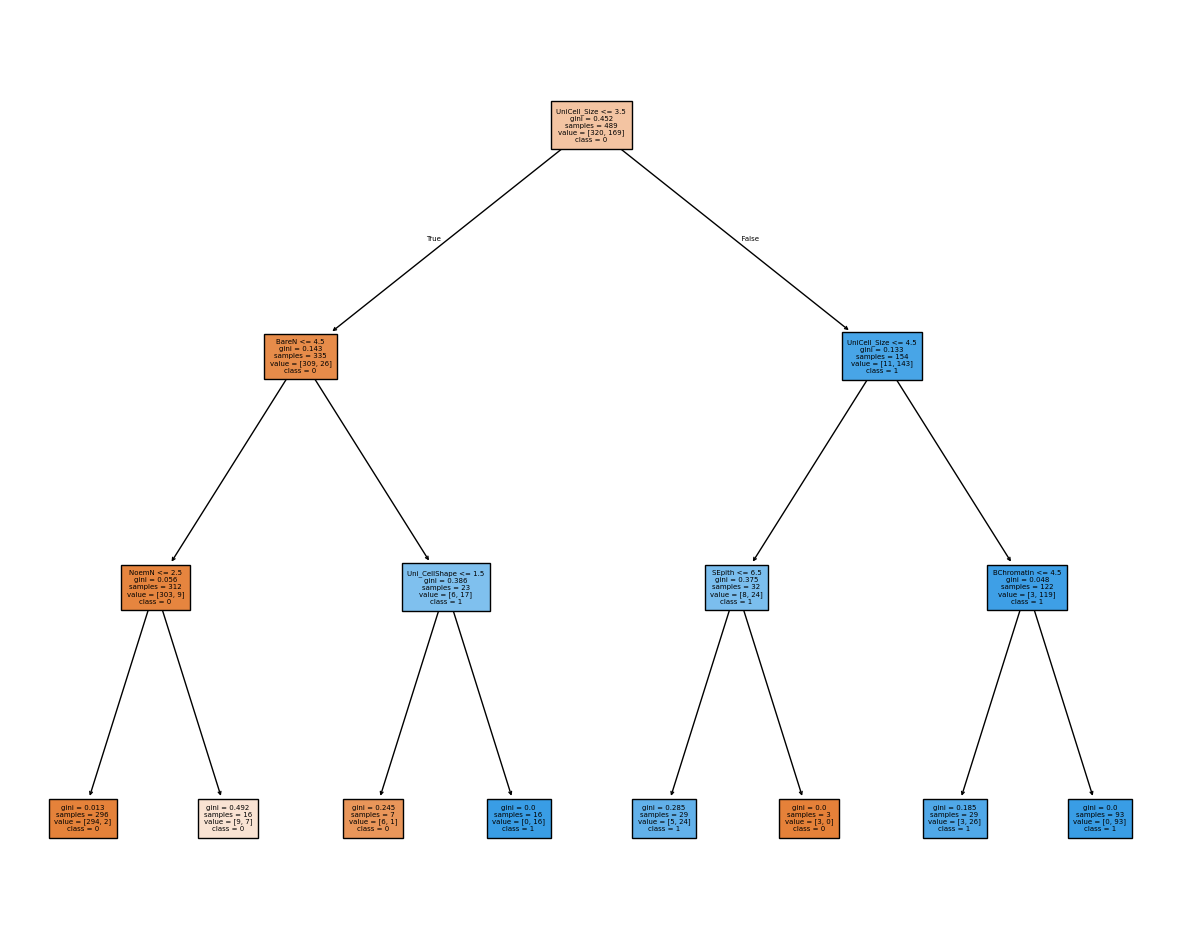

In [21]:
# with customized Depth of Decision Tree beacuse by default it takes the full depth
dtc = DecisionTreeClassifier(random_state=24, max_depth=3)
dtc.fit(X_train,y_train)
plt.figure(figsize=(15,12))
plot_tree(dtc, feature_names= list(X.columns), class_names=['0','1'], filled= True, fontsize=5)
plt.show()

In [10]:
y_pred = dtc.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9571428571428572


In [11]:
# With GridSearch CV
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=24)
params = {'max_depth':[2,3,4,5,6, None]}
gcv = GridSearchCV(dtc, param_grid=params, scoring='roc_auc', verbose=3)
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................max_depth=2;, score=0.954 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.917 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.963 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.912 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.972 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.919 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.930 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.949 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.933 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.999 total time=   0.0s
[CV 1/5] END .......................max_depth=4;, score=0.964 total time=   0.0s
[CV 2/5] END .......................max_depth=4;,

GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]}, scoring='roc_auc',
             verbose=3)

In [12]:
best_tree = gcv.best_estimator_

In [13]:
print("Best Parameter: ",gcv.best_params_)
print("Best Score: ",gcv.best_score_)
# print("Best Depth: ", gcv.best_estimator_.get_depth())

Best Parameter:  {'max_depth': 4}
Best Score:  0.9526710115864528


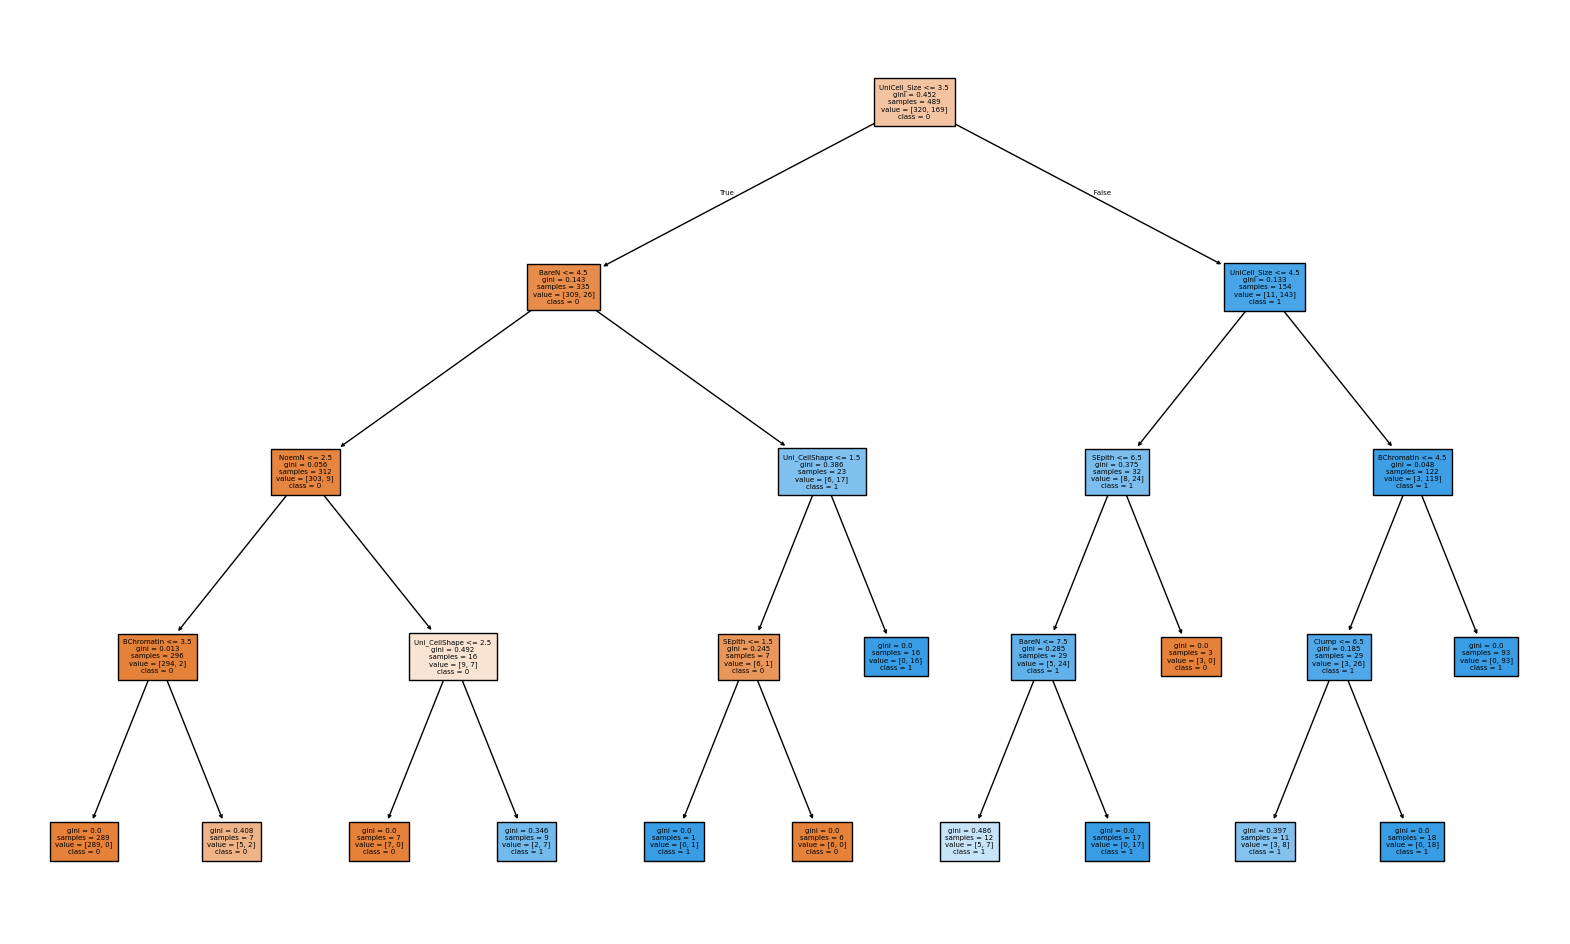

In [22]:
# plotting best tree
plt.figure(figsize=(20,12))
plot_tree(best_tree, feature_names= list(X.columns), class_names=['0','1'], filled= True, fontsize=5)
plt.show()

In [15]:
#  For getting important features which are frequently used and reducing the gini index
best_tree.feature_importances_

array([0.004954  , 0.75782263, 0.05813637, 0.        , 0.0265262 ,
       0.11733622, 0.00775033, 0.02747426, 0.        ])

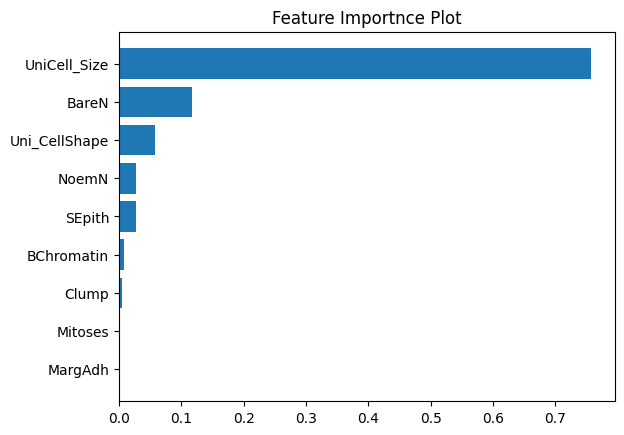

In [16]:
df_imp = pd.DataFrame({'feature': list(X.columns),
                      'importance':best_tree.feature_importances_})
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importnce Plot")
plt.show()
